In [1]:
import numpy as np
from sklearn import datasets
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# useful utility function (see https://scikit-learn.org/stable/modules/compose.html of more details)
from sklearn.pipeline import Pipeline, make_pipeline
# useful utility to optimize hyperparameters (see https://scikit-learn.org/stable/modules/grid_search.html#grid-search for more details)
from sklearn.model_selection import GridSearchCV
# dataset splitting utilities (see https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators for more details)
from sklearn.model_selection import ShuffleSplit, KFold
# helper function to plot a ROC curve (see https://scikit-learn.org/stable/visualizations.html#visualizations for more details)
from sklearn.metrics import RocCurveDisplay, r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandas as pd

# Predict housing prices

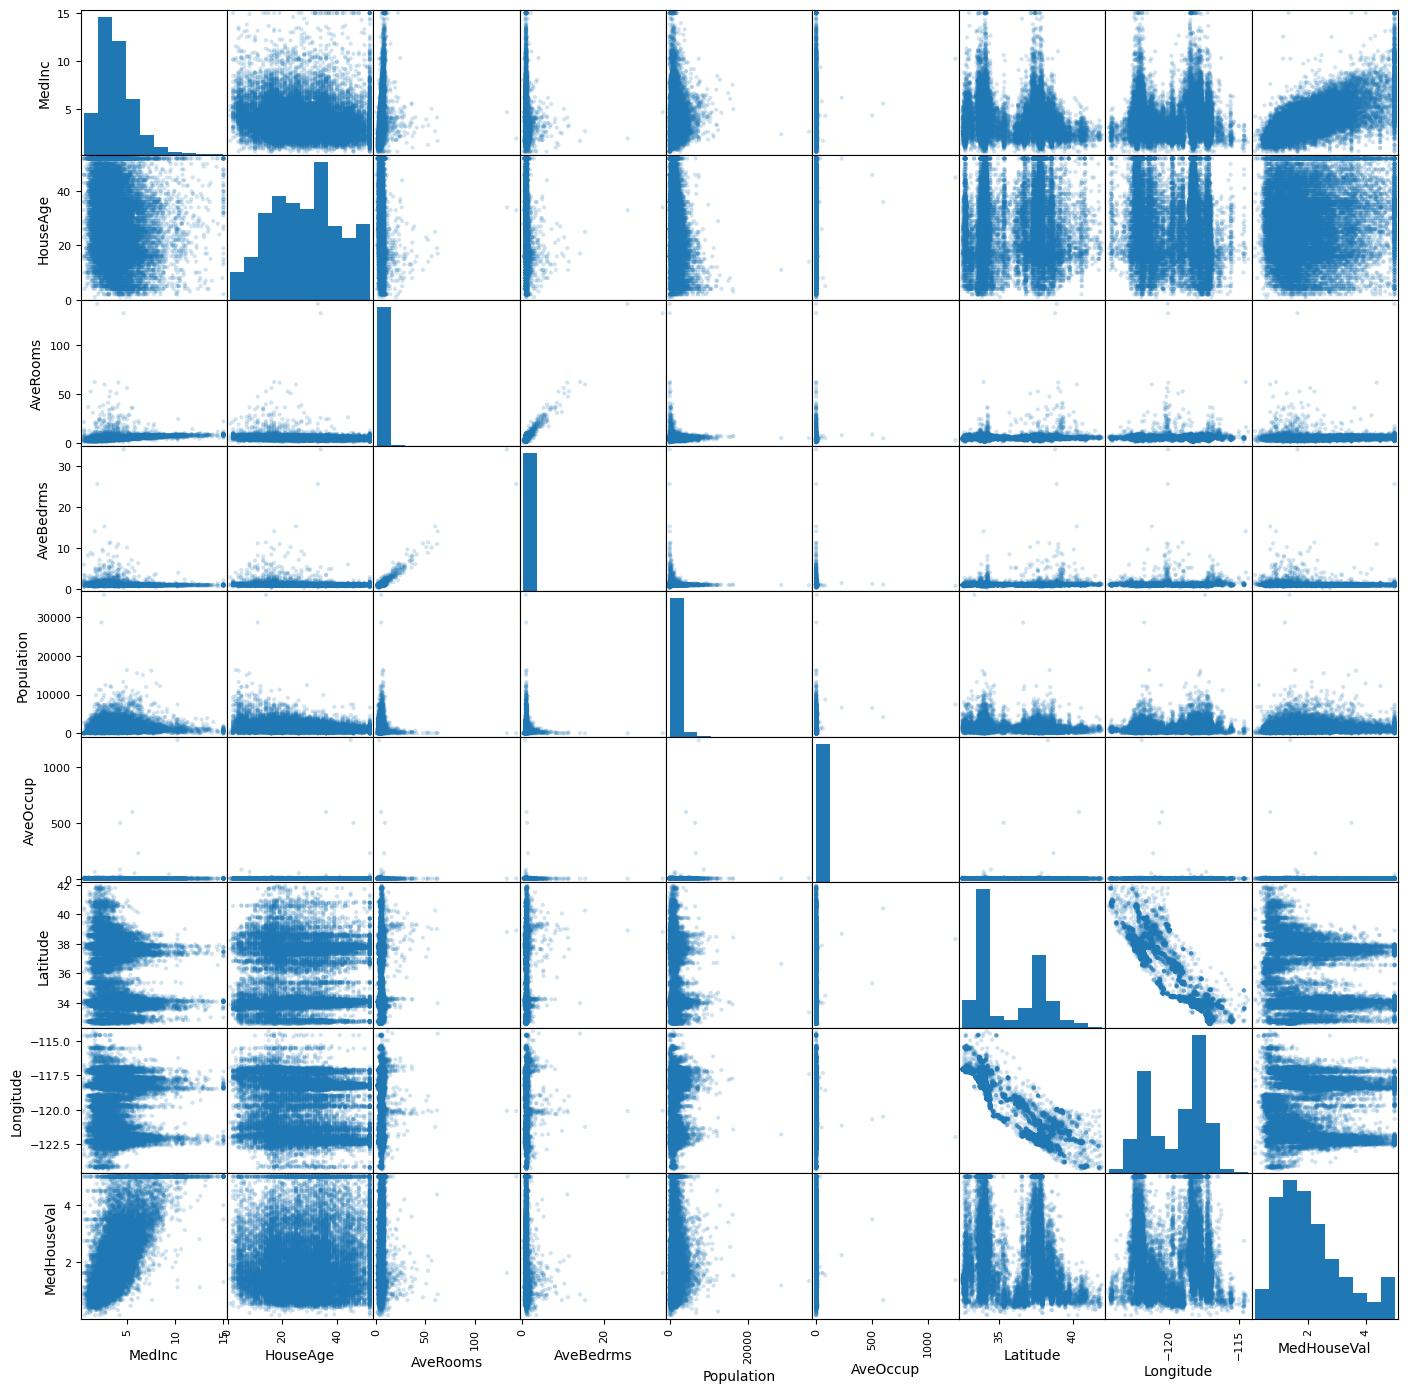

In [2]:
# have a look at the dataset's features and target correlations
housing = datasets.fetch_california_housing(return_X_y=False, as_frame=True)
c = pd.plotting.scatter_matrix(pd.concat([housing.data, housing.target],axis=1), alpha=0.2, figsize=(17, 17), diagonal='hist')
c;

In [3]:
# load the dataset as a feature matrix and target vector
housing_X, housing_y = datasets.fetch_california_housing(return_X_y=True)
# list of features in column order
xcol=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']


## Linear regression

## MLP Regression

Using `Pipeline` and `GridSearchCV` is recommended.

In [4]:
# Set of hyperparameters to search on using a grid search strategy and a cross validated score following the GridSearCV format
param_grid = [
    {
        "mlpregressor__hidden_layer_sizes": [(5), (30), (10,10,10), (30,30)], 
        "mlpregressor__activation":['identity', 'tanh'],
        "mlpregressor__alpha": [1e-4, 1e-2, 1],
    }
]

# define a separate test set (keep the random_state fixed)
X_train, X_test, y_train, y_test = train_test_split(housing_X, housing_y, test_size=0.1, random_state=43738)

In [5]:
scaler = StandardScaler().fit(X_train)
mlpr = MLPRegressor(max_iter=1000)

pipe = Pipeline([('scaler', scaler), ('mlpregressor', mlpr)])

gscv = GridSearchCV(pipe, param_grid=param_grid,scoring='r2')

gscv.fit(X_train, y_train)

/Users/admin/Documents/ml-for-mp/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
print(f"Best pipeline parameters:" + "".join([f"\n\t{key}: {object}" for key, object in gscv.best_params_.items()]))
print(f"Best score from GridSearchCV: {gscv.best_score_}")
y_pred = gscv.predict(X_test)
print(f"Prediction R2 Scoring: {r2_score(y_test, y_pred)}")

NameError: name 'gscv' is not defined

In [ ]:
%matplotlib inline
# RocCurveDisplay.from_predictions(y_test, gscv.decision_function(X_test))
plt.show()

Steps taken for optimization:
- Checked both `lbfgs` and `sgd` solver options for the MLPRegressor. Neither of them yielded results. The `lbfgs` failed to converge for 1000 iterations

# Predict Tumor state

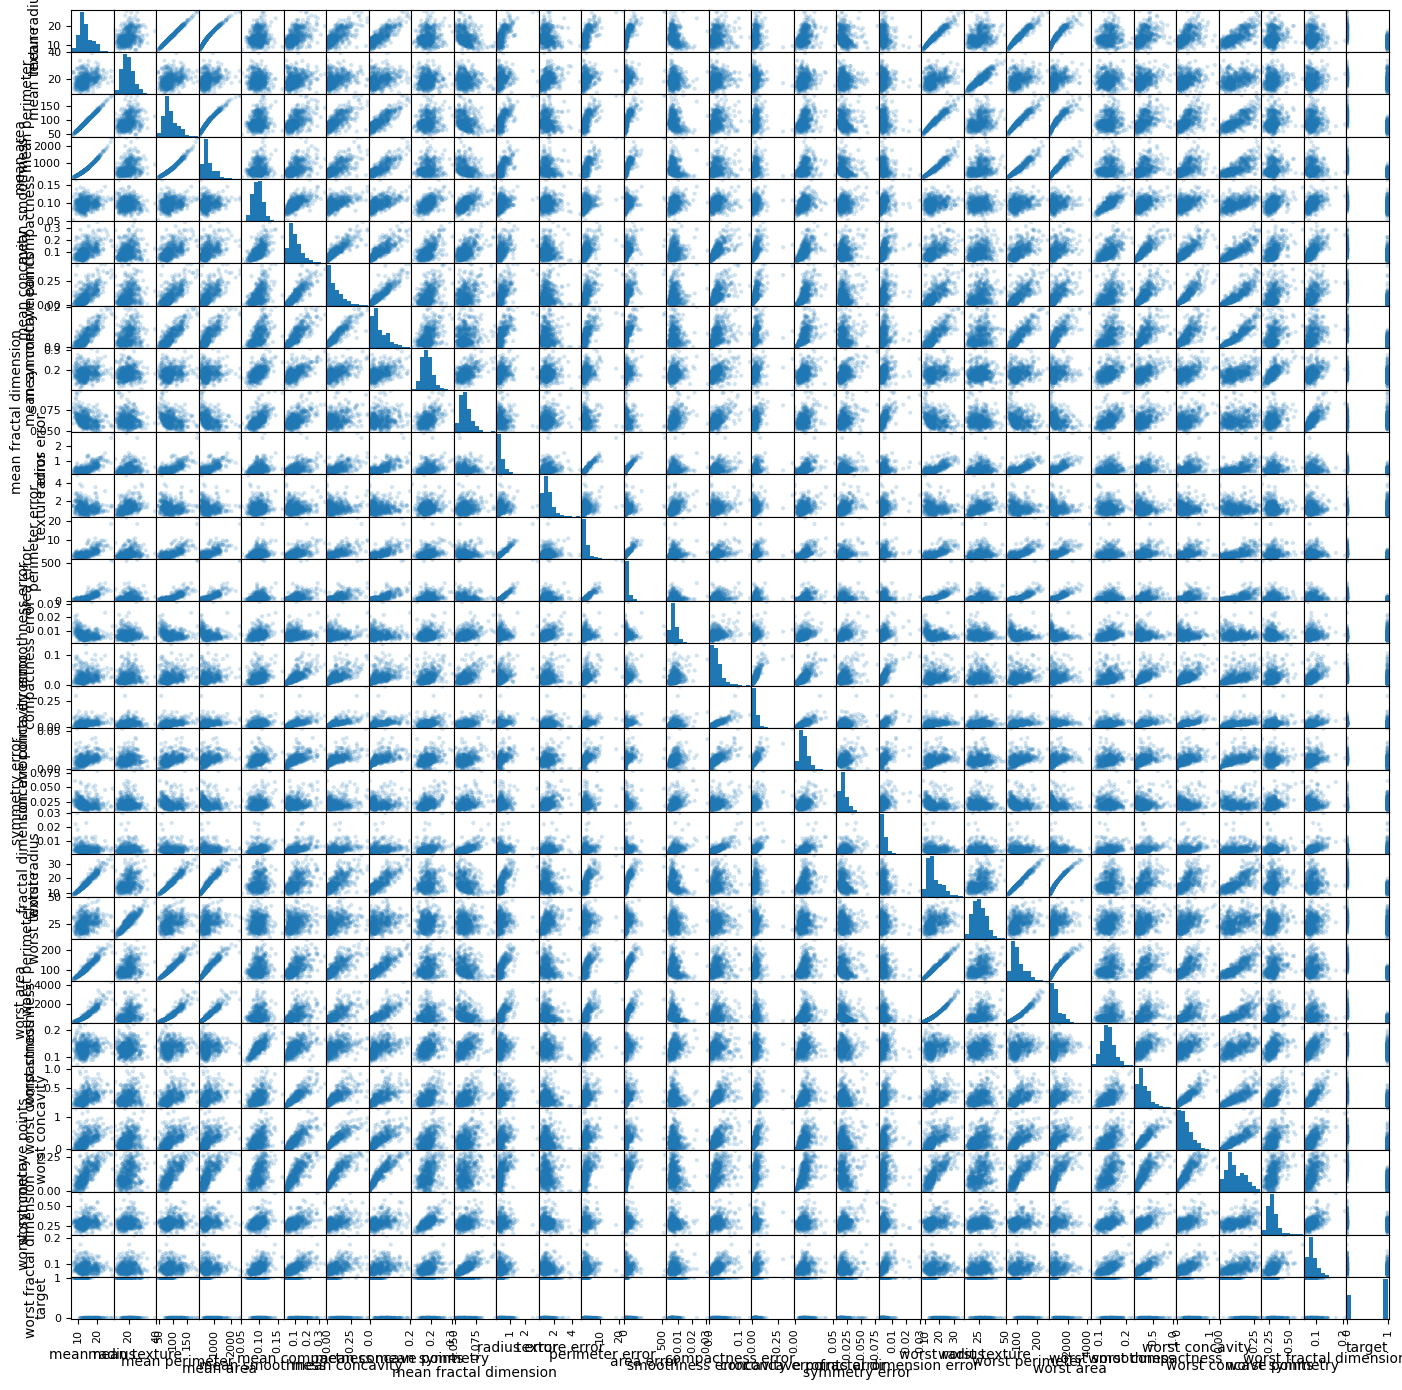

In [ ]:
# have a look at the dataset's features and target correlations
cancer = datasets.load_breast_cancer(as_frame=True)
c = pd.plotting.scatter_matrix(pd.concat([cancer.data,cancer.target],axis=1), alpha=0.2, figsize=(17, 17), diagonal='hist')
c;

In [ ]:
# load the dataset as a feature matrix and target vector
cancer_X, cancer_y = datasets.load_breast_cancer(return_X_y=True)
# list of features in column order
xcol = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

# define a separate test set (keep the random_state fixed)
X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, test_size=0.25, random_state=43738)

hyperparameters = dict(hidden_layer_sizes=(5,),activation='tanh', 
                    max_iter=6000,solver='adam',warm_start='false')

0.8686868686868687


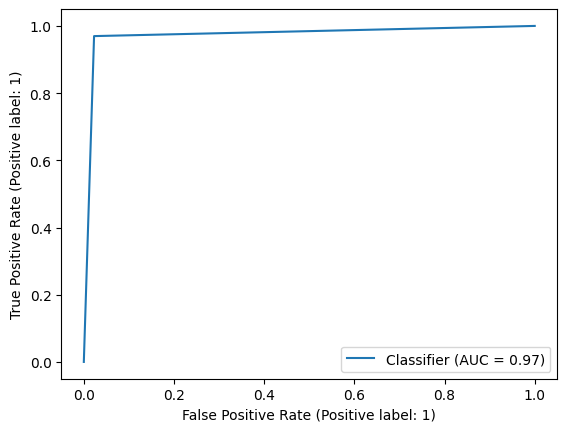

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, test_size=0.25, random_state=43738)

# Using a logistic regressor
logistic_regressor= LogisticRegression()
scaler = StandardScaler().fit(X_train)

pipe = Pipeline([('scaler', scaler), ('logistic_regressor', logistic_regressor)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print(r2_score(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test, y_pred)

0.6583561432388007


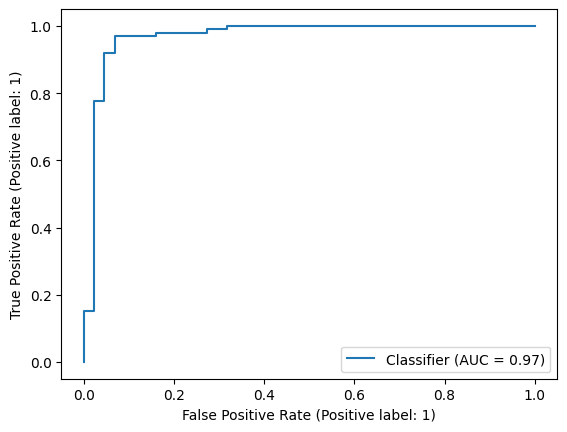

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, test_size=0.25, random_state=43738)

# Using an MLP regressor
scaler = StandardScaler().fit(X_train)
mlpr = MLPRegressor(**hyperparameters)

pipe = Pipeline([('scaler', scaler), ('mlpregressor', mlpr)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test, y_pred)

0.4637777828906863


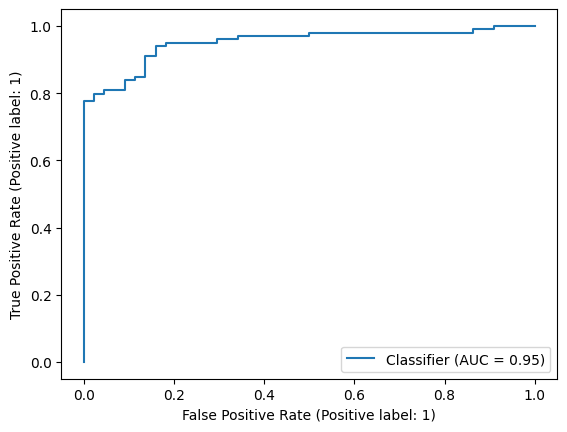

In [ ]:
# Using feature subset
feature_subset = ['mean radius', 'mean concavity']
cancer_subset_X = pd.DataFrame(cancer_X, columns=xcol)[feature_subset]

# define a separate test set (keep the random_state fixed)
X_train, X_test, y_train, y_test = train_test_split(cancer_subset_X, cancer_y, test_size=0.25, random_state=43738)

# Using an MLP regressor
scaler = StandardScaler().fit(X_train)
mlpr = MLPRegressor(**hyperparameters)

pipe = Pipeline([('scaler', scaler), ('mlpregressor', mlpr)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test, y_pred)

0.606060606060606


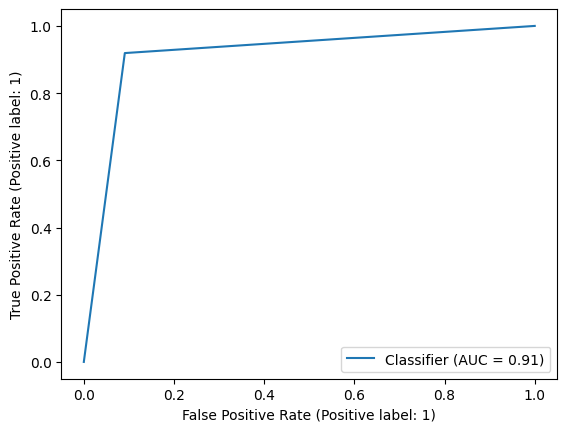

In [ ]:
# Using feature subset
feature_subset = ['mean radius', 'mean concavity']
cancer_subset_X = pd.DataFrame(cancer_X, columns=xcol)[feature_subset]

# define a separate test set (keep the random_state fixed)
X_train, X_test, y_train, y_test = train_test_split(cancer_subset_X, cancer_y, test_size=0.25, random_state=43738)

# Using an MLP regressor
scaler = StandardScaler().fit(X_train)
logistic_regressor = LogisticRegression()

pipe = Pipeline([('scaler', scaler), ('logistic_regressor', logistic_regressor)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test, y_pred)